# Introduction

This project will explore the Starbucks drink menu. The datasets for it is taken from kaggle.

- https://www.kaggle.com/ashishpatel26/starbucks_drinkmenu_expanded


Some of the questions that I am looking to explore from this dataset are

- Which drinks have the most sugar
- Which drinks are the most healthy and which drinks are unhealthy


Some of the nutritional facts that will help me determine which drinks are unhealty are:

#### Added Sugars (according to Webmd)

- For women: 25 grams per day max
- For men: 36 gramsper day max

#### Caffeine (Mayoclinic)

- 400 milligrams is safe amount for a healthy adult


#### Cholesterol (uscfhealth)

- No more than 300 milligrams per day


#### Calories

- Active Women: 1600-2400 per day
- Active Men: 2000-3200 per day

# Loading the dataset


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches

In [2]:
#drinks = pd.read_csv('starbucks-menu-nutrition-drinks.csv')
drinks = pd.read_csv('starbucks_drinkMenu_expanded.csv')

In [3]:
drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [4]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [5]:
drinks = drinks.rename(columns = {'Beverage_category':'Beverage Category', 'Beverage_prep':'Beverage Prep'})

In [6]:
drinks.isnull().sum()

Beverage Category            0
Beverage                     0
Beverage Prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [7]:
drinks['Caffeine (mg)'].value_counts()

75        37
0         35
150       34
70        14
varies    12
95        11
Varies    10
110        9
130        7
120        6
25         6
175        4
90         4
125        3
145        3
30         3
50         3
85         3
10         3
100        3
180        3
15         3
20         3
170        3
140        3
55         3
80         3
165        2
260        1
225        1
235        1
300        1
65         1
330        1
105        1
410        1
Name: Caffeine (mg), dtype: int64

Replacing the rows that dont have the right data with NaN and then dropping them

In [8]:
drinks.replace(['-', 'varies', 'Varies'], np.nan, inplace = True)

In [9]:
drinks['Caffeine (mg)'].isnull().sum()

23

In [10]:
drinks.dropna(inplace = True)

In [11]:
drinks.drop(237, inplace = True)

In [12]:
drinks[['Caffeine (mg)']] = drinks[['Caffeine (mg)']].astype(float)

In [13]:
drinks.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Caffeine (mg)
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,201.041284,1.399541,0.039450,6.674312,136.857798,37.160550,0.844037,33.940367,7.305046,89.931193
std,102.272308,1.687676,0.073137,8.841637,80.426988,20.877234,1.444355,19.913202,4.799032,64.589236
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.500000,0.100000,0.000000,0.000000,80.000000,21.000000,0.000000,19.000000,4.000000,51.250000
50%,190.000000,0.500000,0.000000,5.000000,127.500000,36.000000,0.000000,33.000000,6.000000,75.000000
75%,270.000000,2.000000,0.100000,10.000000,180.000000,52.500000,1.000000,44.000000,10.000000,143.750000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000


Replacing the % sign from the data and changing the type to float

In [14]:
drinks['Vitamin A (% DV) '] = drinks['Vitamin A (% DV) '].str.replace('%', '')
drinks['Vitamin A (% DV) ']

0       0
1       0
2       0
3       0
4      10
       ..
236     8
238     6
239     6
240     4
241     8
Name: Vitamin A (% DV) , Length: 218, dtype: object

In [15]:
drinks['Vitamin C (% DV)'] = drinks['Vitamin C (% DV)'].str.replace('%', '')


In [16]:
drinks[' Calcium (% DV) '] = drinks[' Calcium (% DV) '].str.replace('%', '')


In [17]:
drinks['Iron (% DV) '] = drinks['Iron (% DV) '].str.replace('%', '')

In [18]:
drinks[['Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', ' Total Fat (g)']] = drinks[['Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', ' Total Fat (g)']].astype(float)

## EDA

First of all lets look at the distributions of each column

In [19]:
sns.set_style("darkgrid", {'axes.grid' : False})

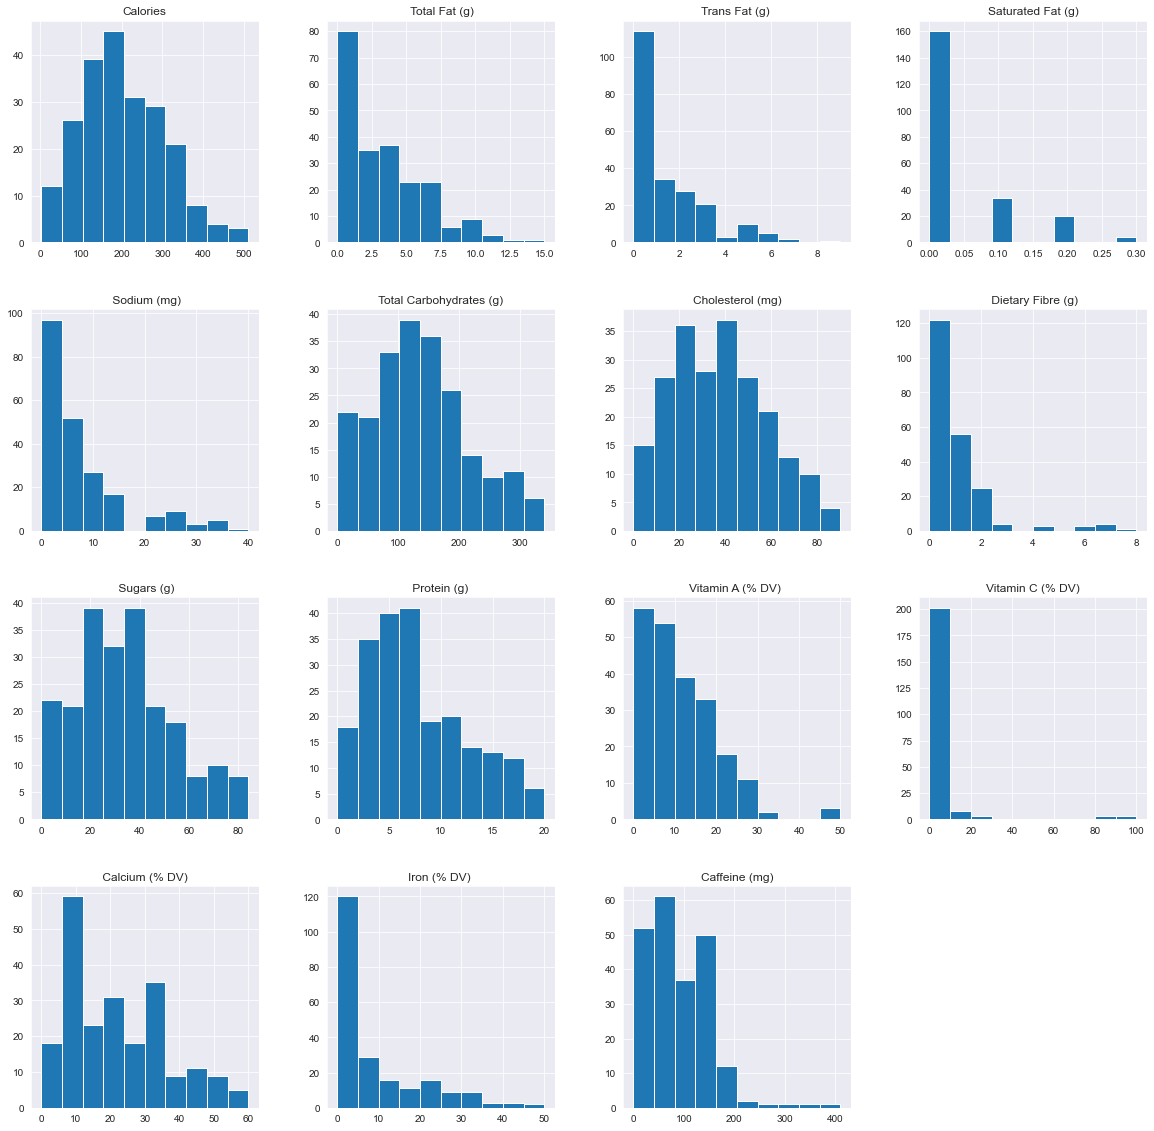

In [20]:
drinks.hist(figsize=(20, 20))
plt.show()

### Checking the sugar levels in each beverage category

Now I am going to be looking at the average amount of sugar in grams that is present in each beverage category 

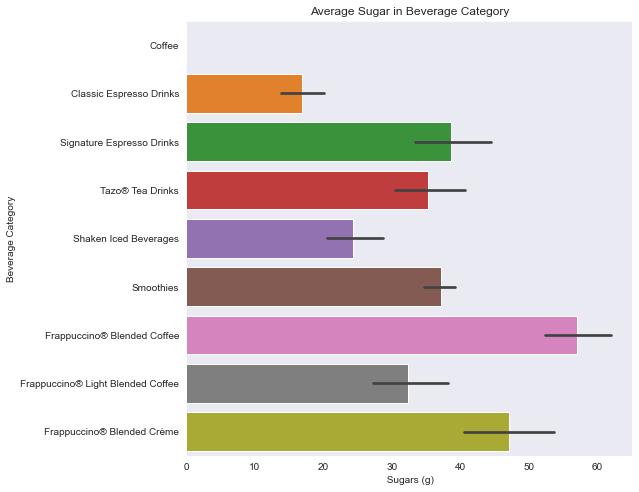

In [41]:
_ = plt.figure(figsize=(8, 8))
_ = sns.barplot(y='Beverage Category', x=' Sugars (g)', data = drinks)
_ = plt.title('Average Sugar in Beverage Category')
_ = plt.show()

Here the beverage category that has the most amount of sugar is Frappuccino Blended Coffee with approximately 57 grams of sugar in drinks on average. Also we can see that most of the drinks have added sugar more than recommended levels per day especially for women 

### Ckecking Calories in beverage categories

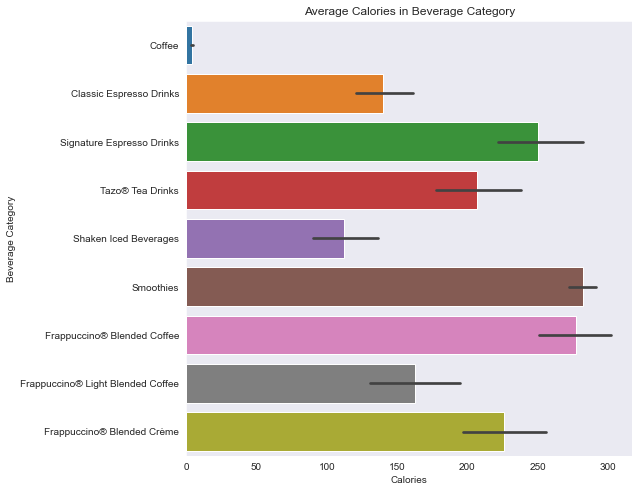

In [42]:
_ = plt.figure(figsize=(8, 8))
_ = sns.barplot(y='Beverage Category', x='Calories', data = drinks)
_ = plt.title('Average Calories in Beverage Category')
_ = plt.show()

The highest calories seem to be in smoothies and Frappuccino Blended Coffee

### Checking Cheloesterol

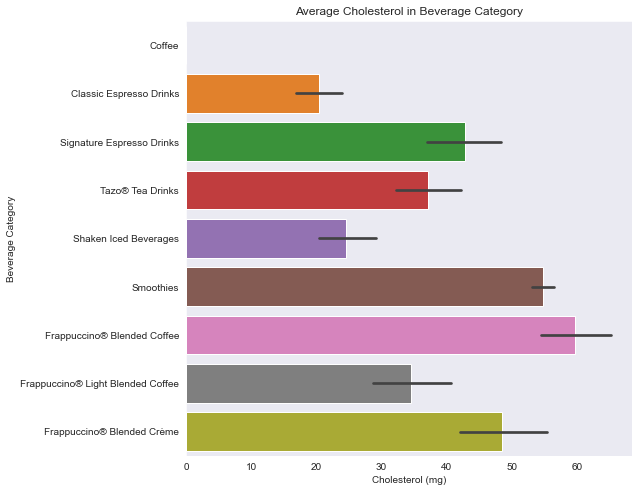

In [43]:
_ = plt.figure(figsize=(8, 8))
_ = sns.barplot(y='Beverage Category', x='Cholesterol (mg)', data = drinks)
_ = plt.title('Average Cholesterol in Beverage Category')
_ = plt.show()

Frappuccino Blended Coffee again has the highest cholesterol

### Checking Caffeine levels

We will check the caffeine levels in each beverage category

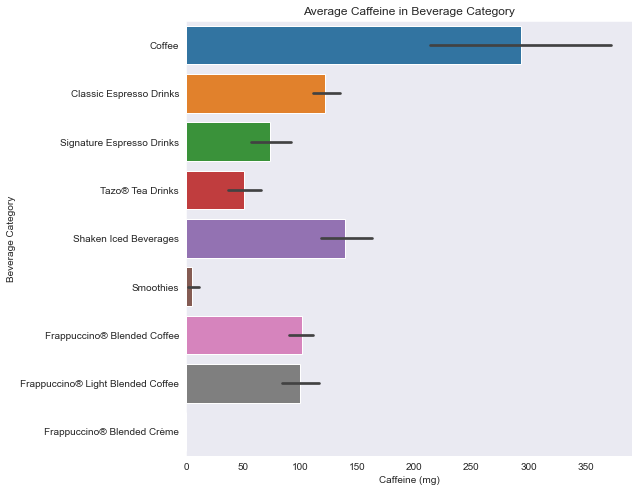

In [44]:
_ = plt.figure(figsize=(8, 8))
_ = sns.barplot(y='Beverage Category', x='Caffeine (mg)', data = drinks)
_ = plt.title('Average Caffeine in Beverage Category')
_ = plt.show()

## Caffeine Vs Calories

Now lets look at the the distribution of drinks with caffeine vs the calories they contain and separate them by Beverage category

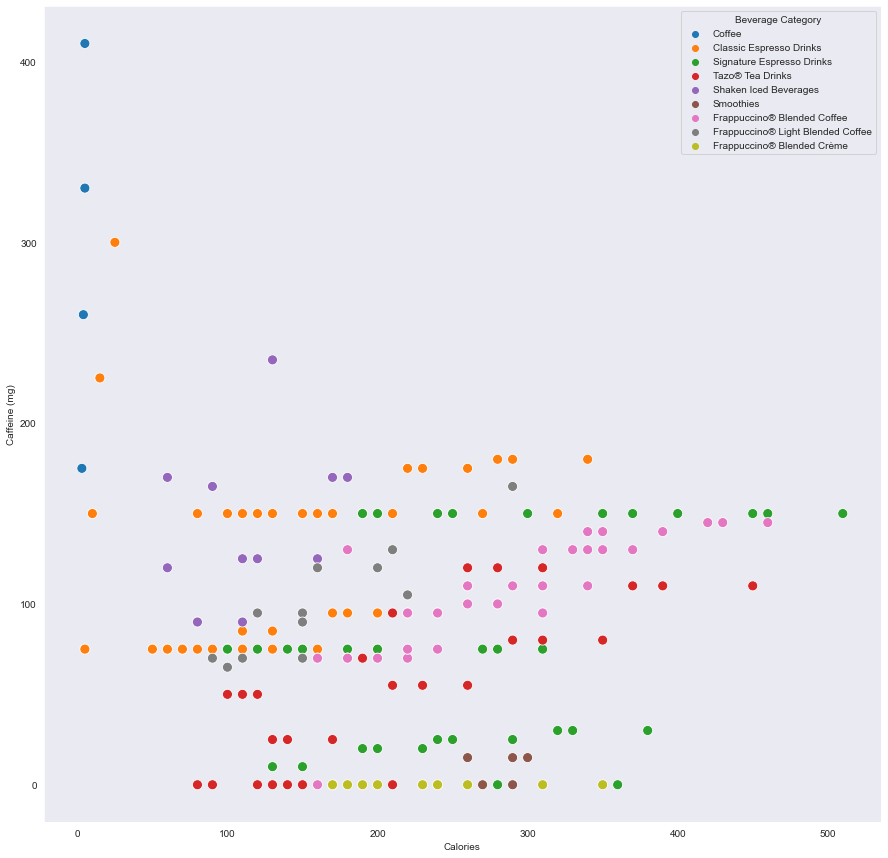

In [27]:
_ = plt.figure(figsize=(15, 15))
_ = sns.scatterplot(y ='Caffeine (mg)', x='Calories', hue='Beverage Category', data = drinks, s=100)
_ = plt.show()

Coffee and Classic Espresso drinks have higher caffeine levels and comparatively lower calories

Now I will take the mean of each nutritional fact and group them by Beverage category so that we can look at some of the relationships between the features

In [29]:
drinksagg = drinks.groupby('Beverage Category').mean().astype(float)
drinksagg.sort_values('Calories')

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
Beverage Category,,,,,,,,,,,,,,,
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.500000,0.000000,293.750000
Shaken Iced Beverages,112.500000,0.625000,0.166667,0.008333,1.250000,25.333333,24.500000,0.000000,24.333333,1.825000,2.500000,0.000000,5.500000,1.000000,139.583333
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207,12.724138,0.206897,27.344828,8.103448,122.068966
Frappuccino® Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000,6.000000,0.000000,11.333333,9.000000,99.583333
Tazo® Tea Drinks,206.666667,2.944444,0.997222,0.050000,8.333333,104.027778,37.111111,0.666667,35.333333,7.916667,12.111111,4.194444,27.222222,5.666667,50.416667
Frappuccino® Blended Crème,225.833333,1.850000,0.800000,0.041667,4.583333,183.750000,48.500000,0.250000,47.166667,3.916667,6.166667,4.333333,13.333333,3.333333,0.000000
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000,13.150000,0.750000,31.375000,10.550000,73.875000
Frappuccino® Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222,5.500000,0.000000,12.277778,10.861111,101.805556
Smoothies,282.500000,2.312500,0.862500,0.012500,6.250000,130.625000,54.750000,6.750000,37.125000,16.750000,21.750000,71.250000,12.500000,13.250000,5.625000


In [32]:
drinksagg = drinksagg[['Calories', 'Cholesterol (mg)',' Sugars (g)', 'Caffeine (mg)']]
drinksagg = drinksagg.sort_values('Calories')
drinksagg = drinksagg.reset_index(drop=False)

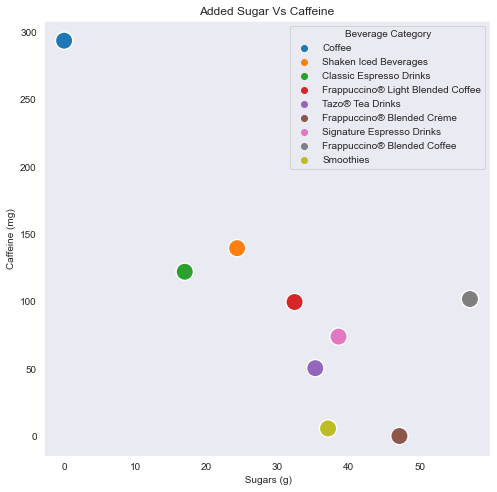

In [45]:
_ = plt.figure(figsize=(8, 8))
_ = sns.scatterplot(y='Caffeine (mg)', x=' Sugars (g)', hue='Beverage Category', data = drinksagg, s = 300)
_ = plt.title('Added Sugar Vs Caffeine')
_ = plt.show()

Here it can be seen that generally drinks with higher added sugars tend to have less caffeine

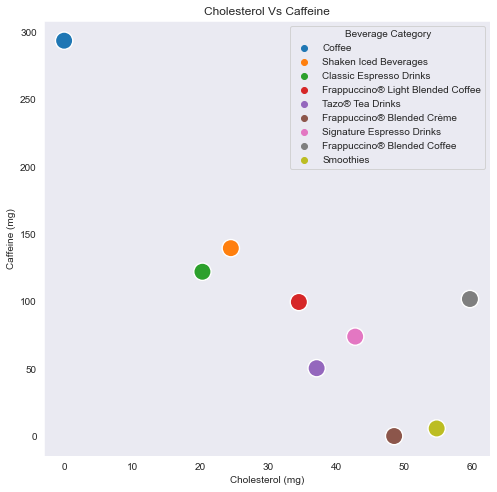

In [48]:
_ = plt.figure(figsize=(8, 8))
_ = sns.scatterplot(y='Caffeine (mg)', x='Cholesterol (mg)', hue='Beverage Category', data = drinksagg, s = 300)
_ = plt.title('Cholesterol Vs Caffeine')
_ = plt.show()

Like with added sugar, higher the cholesterol lower the caffeine level in the drinks

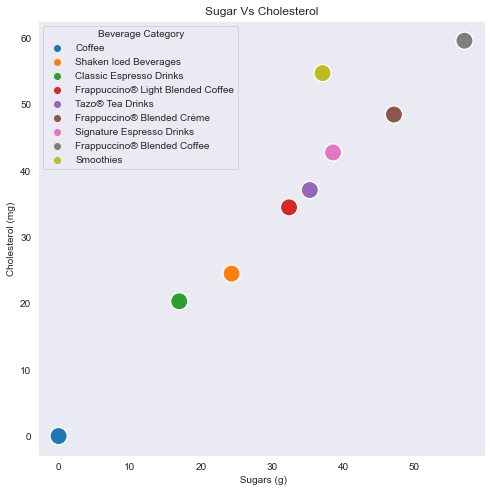

In [50]:
_ = plt.figure(figsize=(8, 8))
_ = sns.scatterplot(y='Cholesterol (mg)', x=' Sugars (g)', hue='Beverage Category', data = drinksagg, s = 300)
_ = plt.title('Sugar Vs Cholesterol')
_ = plt.show()

As can be guessed the drinks with higher amount of added sugar will have higher cholesterol levels

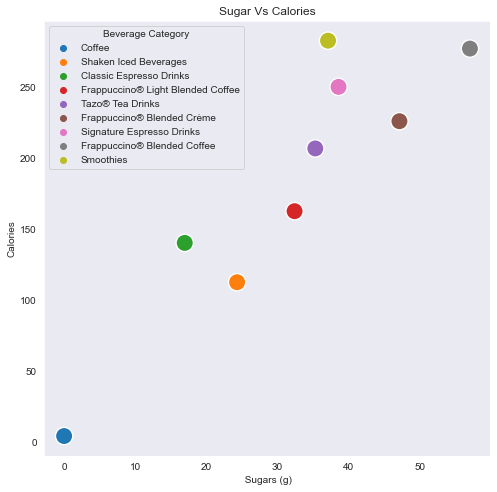

In [51]:
_ = plt.figure(figsize=(8, 8))
_ = sns.scatterplot(y='Calories', x=' Sugars (g)', hue='Beverage Category', data = drinksagg, s = 300)
_ = plt.title('Sugar Vs Calories')
_ = plt.show()

Higher the added sugar, higher the amount of calories in a drink.

Now lets look stacked bar chart, will give as an idea of what might the ratio of the sugar to caffeine and calories to caffeine be in each beverage category on average

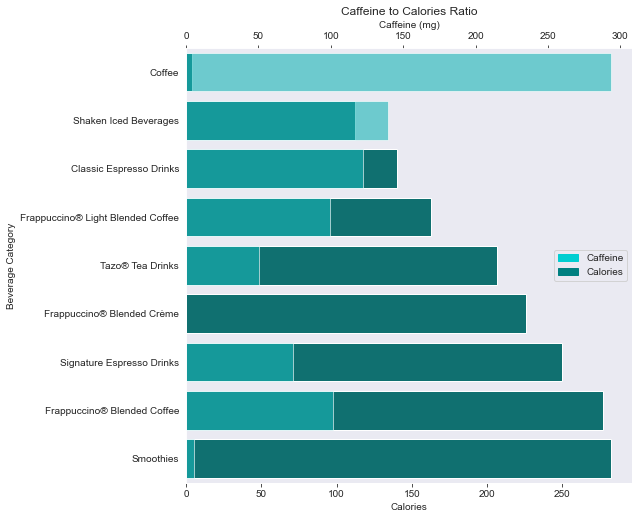

In [76]:
_ = plt.figure(figsize=(8, 8))
g1 = sns.barplot(x='Calories', y="Beverage Category", orient='h', data = drinksagg, color='teal')
ax2 = plt.twiny()
g2 = sns.barplot(x='Caffeine (mg)', y='Beverage Category', orient='h', data = drinksagg, ax=ax2, color='darkturquoise', alpha = 0.6)

blue = mpatches.Patch(color='darkturquoise', label='Caffeine')
green = mpatches.Patch(color='teal', label='Calories')

plt.legend(handles=[blue, green], loc=7)
plt.title('Caffeine to Calories Ratio')

plt.show()

Frappuccino Blended Coffee and Smoothies have the highest calories

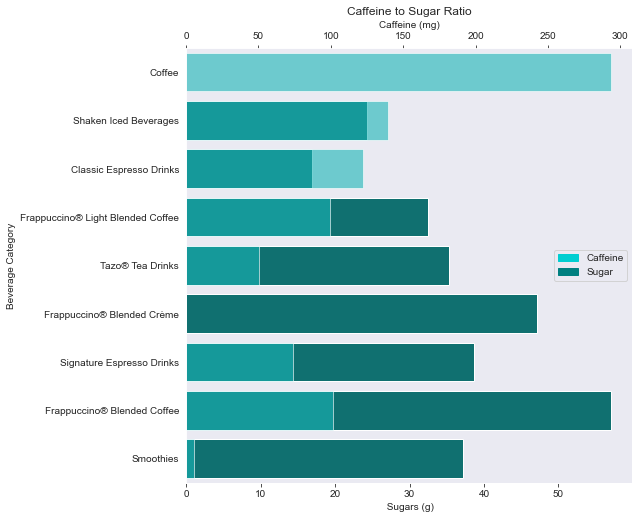

In [78]:
_ = plt.figure(figsize=(8, 8))
g1 = sns.barplot(x=' Sugars (g)', y="Beverage Category", orient='h', data = drinksagg, color='teal')
ax2 = plt.twiny()
g2 = sns.barplot(x='Caffeine (mg)', y='Beverage Category', orient='h', data = drinksagg, ax=ax2, color='darkturquoise', alpha = 0.6)

blue = mpatches.Patch(color='darkturquoise', label='Caffeine')
green = mpatches.Patch(color='teal', label='Sugar')

plt.legend(handles=[blue, green], loc=7)
plt.title('Caffeine to Sugar Ratio')

plt.show()

Smoothies have a lot less sugar than Frappuccino Blended Coffee on average

## Conclusion

According to our analysis, Frappuccino Blended Coffee takes the lead in almost all the nutritional categories, making it the least healthy drink.

Keeping in mind the nutritional facts explained above regarding sugar, cholesterol, caffeine and calories, the following are the healthiest and unhealthiest options:

### Healthy Options

- Coffee
- Classic Espresso Drinks


### Unhealthy Options

- Frappuccino Blended Coffee
- Frappuccino Blended Creme
- Signature Espresso Drinks
- Smoothies



